# Autoencoder demonstration of Fisher metric pruning:

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from tqdm.autonotebook import tqdm
import autoencoder

/var/folders/91/t5gt4nr502vgy7gsbqgd47wm0000gn/T/ipykernel_11294/1800734416.py:6: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


## Train a degenerate autoencoder
__256 hidden neurons in latent space__

In [2]:
model = autoencoder.MNISTModel(latent_dim=20)
model.train()

Epochs: 100%|██████████| 10/10 [00:19<00:00,  1.91s/it]


Completed training successfully...


## Testing
__(check the performance of the encoder)__

In [3]:
# Define a transform to map from image to pixel floats
transform = transforms.Compose([transforms.ToTensor(), torch.flatten])

# Create testing dataset
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transform, download=True
)

# Create testing dataloader
test_dataloader = torch.utils.data.DataLoader(
    dataset=test_dataset, batch_size=10, shuffle=True
)


In [4]:
import matplotlib.pyplot as plt

def plot_batch(images):
    # Plot the batch of images
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].view(28, 28).detach().numpy(), cmap='gray')
        # plt.title(f"Image {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [5]:
# Get a batch of images
iterator = iter(test_dataloader)
batches = next(iterator)
batch_0 = batches[0]

### Original images

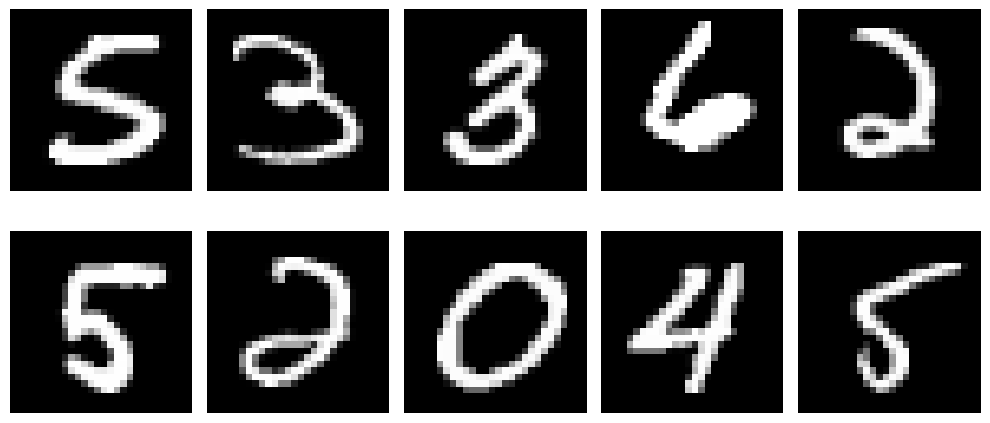

In [6]:
plot_batch(batch_0)

In [7]:
autoencoded_batch = [model.autoencoder(batch_0[i]) for i in range(10)]

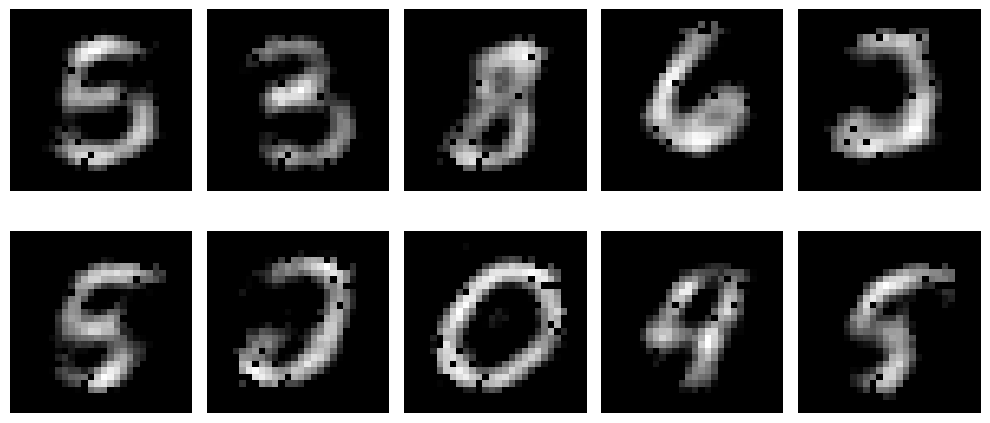

In [8]:
plot_batch(autoencoded_batch)
# autoencoded_batch[0].shape

In [10]:
from nngeometry.object import PMatDiag, PMatDense
from nngeometry.metrics import FIM
from nngeometry.layercollection import LayerCollection
import fisher_transform

In [11]:
fim = fisher_transform.find_fisher(model.autoencoder, test_dataloader,
                                   n_output=784)
sloppy_rows = fisher_transform.get_sloppy_rows(fim, model.autoencoder, cutoff=1)
stiff_gen_model = fisher_transform.zero_sloppy_params(
    fim, sloppy_rows, model.autoencoder)


Autoencoder(
  (encoder): Sequential(
    (0): ReLU()
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=784, bias=True)
    (1): ReLU()
  )
)
[15680 15700 31380 32164]
Removed 12979 params


In [12]:
stiff_autoencoded_batch = [model.autoencoder(batch_0[i]) for i in range(10)]

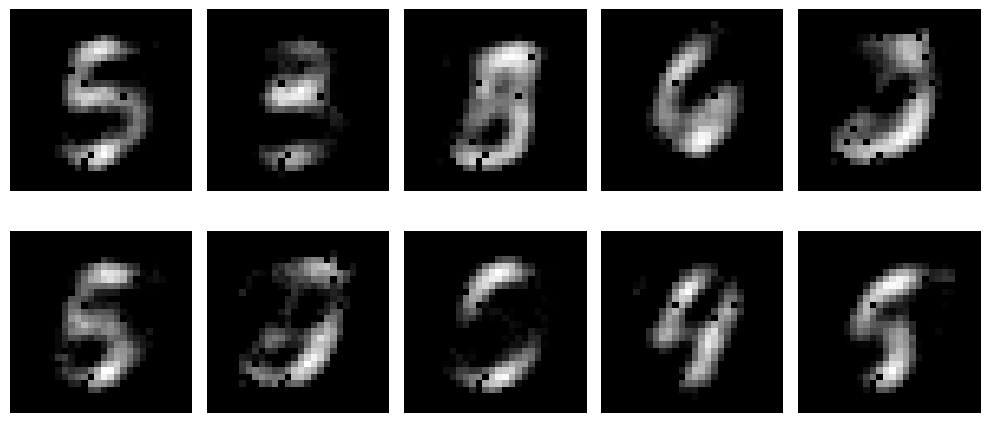

In [13]:
plot_batch(stiff_autoencoded_batch)